<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/%EA%B3%BC%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모든 모델은 교차검증을 통한 검증데이터를 바탕으로 학습을 하였으며,

test_set에서 80% 이상의 정확도를 갖는 것을 목표로 훈련하였습니다

<h1>타이타닉 데이터 세트 전처리 </h1>

대부분의 모델에 기본적으로 들어갈 데이터 전처리를 실행함

특수한 전처리가 필요한 경우,
이 데이터를 바탕으로 각자의 영역에서 따로 전처리 실행

# 데이터 가져오기 및 내용 출력 ( 파악 )

In [24]:

import pandas as pd
import numpy as np

# 데이터 셋이 3개로 나뉘어져 있음
# train.csv는 train을 위한 데이터
# test.csv는 test를 위한 데이터 ( 하지만 Survive 여부가 없음 => target이 나누어진 상태 )
# gender_submission.csv는 test의 survive 특성( target )이 들어가있음
train_data_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
test_target_data_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

print(train_data_set.info)
print("//")
print(test_data_set.info)
print("//")
print(test_target_data_set.info)
print("//")

print(train_data_set.shape)
print(test_data_set.shape)




<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

# 데이터 상태 분석하기

train.csv를 기준으로
PassengerID, Survived, Pclass, Name, Sex, Age, SibSP, Parch, Ticket, Fare, Cabin, Enbarked로 속성이 있음

* PassengerID = 개인번호
* Survived = 생존여부 ( target ) 1 or 0
* Pclass = 객실 등급 1 or 2 or 3
* Name = 개인 이름
* Sex = 성별  male or female
* Age = 나이
* SibSP = 함께 탑승한 형제 및 배우자 수
* Parch = 함께 탑승한 자식 및 부모 수
* Ticket = 티켓 번호
* Fare = 요금
* Cabin = 선실 번호
* embarked = 탑승장소 S or C or Q

여기서 target은 Survived 속성이며 test데이터에 해당하는 test.csv는 Survived가 gender_submission.csv에 나눠져 있는 상태

# 유실 데이터 파악하기

age 특성과 Cabin 특성에서 많은 유실이 존재

Cabin 특성( 방번호 )의 경우 학습에 도움되지 않기 때문에 없앨 것이므로 따로 유실데이터 처리를 하지 않을 것임

age, fare, embarked 특성은 학습에 이용할 것이기 때문에 유실을 해결해줘야함

In [25]:
print(train_data_set.isnull().sum())
print("/")
print(test_data_set.isnull().sum())
print("/")
print(test_target_data_set.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
/
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
/
PassengerId    0
Survived       0
dtype: int64


# 유실 데이터 해결

fillna(method="pad") 를 사용하여 앞의 값으로 채우거나

보간법을 사용할수도 있지만, 위의 데이터의 경우 각 행이 독립적( 독립된 개인 ) 이므로 이 방법은 적합하지 않음

1. Age : age 특성에 가해지는 영향을 줄이기 위해서 age 특성의 평균치를 넣어줄 것임

2. fare : 결측치를 가진 데이터의 Pclass를 조사 ( 해당 인물의 부유함 유추 ), 그 Pclass에 해당하는 데이터들의 fare 평균으로 대체할 것

3. Embarked : 유추할 방도가 없으므로 앞의 값으로 채우는 방법 사용

4. Cabin : 유의미하지 않은 데이터로 이후에 제거할 것이므로 고려하지 않음

In [26]:
import numpy as np

# train_data에서 Age 특성의 평균값은 29.69911764705882 ( 일반적인 나이는 자연수지만 데이터이므로 상관없음 )
print(np.mean(train_data_set["Age"]))
# test_data에서 Age 특성의 평균값은 30.272590361445783 ( 일반적인 나이는 자연수지만 데이터이므로 상관없음 )
print(np.mean(test_data_set["Age"]))

print("//")
# Fare가 null인 데이터는 TestSet에만 1개 존재
# Fare가 null인 데이터의 PassengerId 는 1044 이며, 해당 데이터의 Pclass는 3 임
print(test_data_set[test_data_set["Fare"].isnull() == True])
# Pclass = 3인 데이터의 Fare 평균값은 12.459677880184334
print(np.mean((test_data_set[test_data_set["Pclass"]==3])["Fare"]))

print("//")

train_change_data = {'Age':29.69911764705882}
test_change_data = {'Age':30.272590361445783, 'Fare':12.459677880184334}

# Age, Fare의 실측값 채워줌
train_data_set_fill = train_data_set.fillna(value=train_change_data)
test_data_set_fill = test_data_set.fillna(value=test_change_data)

# Embarked 가 null인 데이터는 train데이터에만 2개 존재하며, 유추할 수 없으므로 이전 값을 그대로 가져올 것
# Embarked 실측값 채워줌
train_data_set_fill = train_data_set_fill.fillna(method="ffill")

print("결과")
print(train_data_set_fill)
print("//")
print(test_data_set_fill)

print("실측값 갯수")
print(train_data_set_fill.isnull().sum())
print("//")
print(test_data_set_fill.isnull().sum())

# 나중에 지워줄 특성인 Cabin을 제외하곤 실측값이 없어짐


29.69911764705882
30.272590361445783
//
     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  
12.459677880184334
//
결과
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                             

# 필요없는 특성 없애기

* PassengerID = 개인번호
* Survived = 생존여부 ( target ) 1 or 0
* Pclass = 객실 등급 1 or 2 or 3
* Name = 개인 이름
* Sex = 성별  male or female
* Age = 나이
* SibSP = 함께 탑승한 형제 및 배우자 수
* Parch = 함께 탑승한 자식 및 부모 수
* Ticket = 티켓 번호
* Fare = 요금
* Cabin = 선실 번호
* Embarked = 탑승장소 S or C or Q

------------------------

1. PassengerID, Name, Ticket, Cabin은 학습에 필요없는 특성

2. Pclass, Sex, Age, SibSP, Parch, Fare, embarked는 학습에 필요한 특성

3. Survived 는 타겟 특성

In [27]:
train_data_fill_del = train_data_set_fill[["Pclass","Sex","Age","SibSp","Parch",'Fare','Embarked']]
train_target_fill_del = train_data_set_fill["Survived"]
test_data_fill_del = test_data_set_fill[["Pclass","Sex","Age","SibSp","Parch",'Fare','Embarked']]
test_target_fill_del = test_target_data_set["Survived"]

print(train_data_fill_del.head())
print("//")
print(train_target_fill_del.head())
print("//")
print(test_data_fill_del.head())
print("//")
print(test_target_fill_del.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S
//
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
//
   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S
//
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


# 문자를 숫자로 인코딩 => 특성 전처리 1

문자로 쓰여진 데이터는 숫자로 바꿔줘야함 => 인코딩

Sex(성별)와 같이 2개로 나눠어진 경우 0,1 로 나타낼 수 있고,

Pclass(객실등급)의 경우에도 숫자에 따른 등급상승이므로 1,2,3이 특성의 대표성을 유지함

하지만

Embarked와 같이 서로 독립된 값이 3개 이상으로 갈라지는 경우, 수의 연속성에 의한 왜곡이 일어날 수 있음

( 예를 들어 Embarked의 경우 Q , S , C 가 각각 0 , 1 , 2로 바뀌었을 때,

각각이 서로 연관성이 없음에도 QS , SC 가 비교적 가깝고,  QC가 비교적 먼 것처럼 인식됨  )

--> Embarked의 경우, 이후에 특성공학을 통해 다른 표현으로 바꿔줄 것이기 때문에 여기서는 일단 넘어감

In [28]:
# 데이터프레임을 복사할때는 copy()를 사용하는 것이 권고됨
train_data_encoding = train_data_fill_del.copy()
test_data_encoding = test_data_fill_del.copy()

# Sex 특성을 0,1 로 인코딩
train_data_Sex = train_data_fill_del["Sex"].replace("male",0).replace("female",1)
train_data_encoding["Sex"] = train_data_Sex
print(train_data_encoding.head())

test_data_Sex = test_data_fill_del["Sex"].replace("male",0).replace("female",1)
test_data_encoding["Sex"] = test_data_Sex
print(test_data_encoding.head())



   Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0       3    0  22.0      1      0   7.2500        S
1       1    1  38.0      1      0  71.2833        C
2       3    1  26.0      0      0   7.9250        S
3       1    1  35.0      1      0  53.1000        S
4       3    0  35.0      0      0   8.0500        S
   Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0       3    0  34.5      0      0   7.8292        Q
1       3    1  47.0      1      0   7.0000        S
2       2    0  62.0      0      0   9.6875        Q
3       3    0  27.0      0      0   8.6625        S
4       3    1  22.0      1      1  12.2875        S


# 작업을 위해 넘파이 배열로 변환

In [29]:
train_input = train_data_encoding.to_numpy()
test_input = test_data_encoding.to_numpy()
train_target = train_target_fill_del.to_numpy()
test_target = test_target_fill_del.to_numpy()

print(train_input.shape)
print(train_input[:5])

print(test_input.shape)
print(test_input[:5])


(891, 7)
[[3 0 22.0 1 0 7.25 'S']
 [1 1 38.0 1 0 71.2833 'C']
 [3 1 26.0 0 0 7.925 'S']
 [1 1 35.0 1 0 53.1 'S']
 [3 0 35.0 0 0 8.05 'S']]
(418, 7)
[[3 0 34.5 0 0 7.8292 'Q']
 [3 1 47.0 1 0 7.0 'S']
 [2 0 62.0 0 0 9.6875 'Q']
 [3 0 27.0 0 0 8.6625 'S']
 [3 1 22.0 1 1 12.2875 'S']]


# 특성공학을 통해 적합한 데이터 표현 찾기

위에서 말했듯이 Embarked 특성을 0,1,2 로 표현할 경우 수의 연속성에 의한 왜곡이 일어날 수 있다.

따라서 특성공학을 통해 데이터에 적합한 다른 방식으로 표현해줄 것이다.

( 여기서는 원 핫 인코딩 방식사용 )


In [30]:
train_Embarked = []
test_Embarked = []

# 원 핫 인코딩을 위해 Embarked 특성을 배열로 뺌
for x in train_input:
  train_Embarked.append(x[6])
print(train_Embarked[:5])

print(np.unique(train_Embarked))

for y in test_input:
  test_Embarked.append(y[6])
print(test_Embarked[:5])

print("//")

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Embarked특성 배열에 OneHotEncoder를 사용하기 위해 먼저 숫자로 매핑 -> 1,2,3으로 매핑됌 ( 특성의 종류가 100개 이상이라도 사용할 수 있는 방법 )
encoder = LabelEncoder()
encoder.fit(train_Embarked)
train_labels = encoder.transform(train_Embarked)
test_labels = encoder.transform(test_Embarked)

# OneHotEncoder에 넣기 전에 ,2차원배열로 변경
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)

# OneHotEncoder를 통해 특성공학 ==> [1,0,0] , [0,1,0] , [0,0,1] 로 각각 매핑됨
oh_encoder = OneHotEncoder()
oh_encoder.fit(train_labels)
train_ohLabels = oh_encoder.transform(train_labels)
test_ohLabels = oh_encoder.transform(test_labels)

print(train_ohLabels.toarray())
print("//")
print(test_ohLabels.toarray())

print("//")

# Embarked 특성 삭제
train_input_d = np.delete(train_input,6,1)
test_input_d =np.delete(test_input,6,1)

# 새로운 넘파이 배열에 Embarked 특성을 삭제한 배열 + 원힛인코딩으로 Embarked를 재구성한 배열 삽입
train_input_h = np.array([])
test_input_h = np.array([])

train_input_h = np.append(train_input_d,train_ohLabels.toarray(),axis=1)
test_input_h = np.append(test_input_d,test_ohLabels.toarray(),axis=1)


print(train_input_h)
print("//")
print(test_input_h)


['S', 'C', 'S', 'S', 'S']
['C' 'Q' 'S']
['Q', 'S', 'Q', 'S', 'S']
//
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
//
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
//
[[3 0 22.0 ... 0.0 0.0 1.0]
 [1 1 38.0 ... 1.0 0.0 0.0]
 [3 1 26.0 ... 0.0 0.0 1.0]
 ...
 [3 1 29.69911764705882 ... 0.0 0.0 1.0]
 [1 0 26.0 ... 1.0 0.0 0.0]
 [3 0 32.0 ... 0.0 1.0 0.0]]
//
[[3 0 34.5 ... 0.0 1.0 0.0]
 [3 1 47.0 ... 0.0 0.0 1.0]
 [2 0 62.0 ... 0.0 1.0 0.0]
 ...
 [3 0 38.5 ... 0.0 0.0 1.0]
 [3 0 30.272590361445783 ... 0.0 0.0 1.0]
 [3 0 30.272590361445783 ... 1.0 0.0 0.0]]


# 데이터 정규화

Fare와 Age 특성의 편차가 다른 특성에 비해 크기 때문에 정규화가 필요하다.


In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input_h)

train_scaled = ss.transform(train_input_h)
test_scaled = ss.transform(test_input_h)

print(train_scaled)
print(test_scaled)


[[ 8.27377244e-01 -7.37695132e-01 -5.92480600e-01 ... -4.83809903e-01
  -3.09743377e-01  6.19306364e-01]
 [-1.56610693e+00  1.35557354e+00  6.38789012e-01 ...  2.06692751e+00
  -3.09743377e-01 -1.61470971e+00]
 [ 8.27377244e-01  1.35557354e+00 -2.84663197e-01 ... -4.83809903e-01
  -3.09743377e-01  6.19306364e-01]
 ...
 [ 8.27377244e-01  1.35557354e+00  4.37434839e-15 ... -4.83809903e-01
  -3.09743377e-01  6.19306364e-01]
 [-1.56610693e+00 -7.37695132e-01 -2.84663197e-01 ...  2.06692751e+00
  -3.09743377e-01 -1.61470971e+00]
 [ 8.27377244e-01 -7.37695132e-01  1.77062908e-01 ... -4.83809903e-01
   3.22847904e+00 -1.61470971e+00]]
[[ 0.82737724 -0.73769513  0.36944878 ... -0.4838099   3.22847904
  -1.61470971]
 [ 0.82737724  1.35557354  1.33137817 ... -0.4838099  -0.30974338
   0.61930636]
 [-0.36936484 -0.73769513  2.48569343 ... -0.4838099   3.22847904
  -1.61470971]
 ...
 [ 0.82737724 -0.73769513  0.67726619 ... -0.4838099  -0.30974338
   0.61930636]
 [ 0.82737724 -0.73769513  0.044131

# 데이터 섞기

데이터가 특정 조건에 따라 나뉘어져 있지 않고,

PassengerId 번호에 따라 나열되어 있기 때문에 따로 섞을 필요성이 없다.



# 교차검증 기법 사용

아래에서 모두 동일하겠지만,

Test 세트에 하이퍼파라미터가 맞춰지는 것을 방지하기 위해서 교차검증기법을 사용하였다.

따라서 기본적으로 훈련세트에서 훈련데이터와 검증데이터를 나눠서 진행할 것이며,

test 세트는 최종적인 성능확인을 위해서만 사용할 것이다.

# 특성공학을 통한 특성 늘리기

SGD분류 이후 필요성을 느껴 아래에 SGD 분류 이후에 적용해놓았음



# SGD 분류용 경고문자 없애기

경고문자가 계속 떠서 경고를 없애주는 코드입니다.

In [40]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# SGD분류

In [41]:
#기본 SGD 분류
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np

sc = SGDClassifier(loss="log_loss",max_iter=10,random_state=201733922)
scores = cross_validate(sc,train_scaled,train_target,return_train_score=True)

print(np.mean(scores['train_score']) , np.mean(scores['test_score']))


0.7547603101312701 0.7654384533299855


현재 과소적합상태로 보임 따라서 일단 max_iter를 늘려 학습량을 늘려야함

max_iter의 값에 따른 추이를 보기 위해서 에포크 그래프를 그린다.

이떄, epoch의 범위는 epoch를 1000까지 해봤을 때, 100 epoch 언저리에서 바뀌지 않는 양상을 보였었기 때문에 200까지로 제한했다.

0.7805864601226027 0.7721298098047831


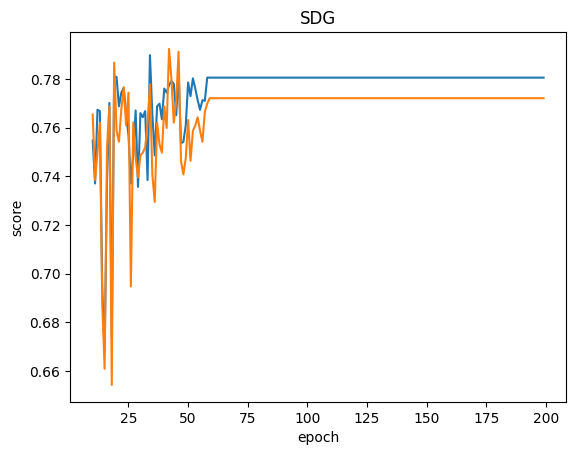

In [42]:

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(10,200,1)

train_score = []
val_score = []

for x in epoch:

  sc = SGDClassifier(loss="log_loss",max_iter=x,random_state=201733922)
  scores = cross_validate(sc,train_scaled,train_target,return_train_score=True)
  train_score.append(np.mean(scores["train_score"]))
  val_score.append(np.mean(scores["test_score"]))

plt.title("SDG")
plt.xlabel("epoch")
plt.ylabel("score")
plt.plot(epoch,train_score)
plt.plot(epoch,val_score)


print(np.mean(scores['train_score']) , np.mean(scores['test_score']))

약 40 ~ 50사이의 max_iter에서 과소적합과 과대적합이 해소되었음,

하지만 각 epoch마다 정확도가 너무 들쭉날쭉으로 불안정한 양상이 보임

이제 다른 하이퍼파라미터들을 조정하여 진행해야한다

다음은 SGD분류 기법에 사용할 수 있는 하이퍼파라미터와 기본값이다.

* loss: str = "hinge"
* penalty: str = "l2"
* alpha: float = 0.0001
* l1_ratio: float = 0.15
* fit_intercept: bool = True
* max_iter: int = 1000
* tol: float = 0.001
* shuffle: bool = True
* verbose: int = 0
* epsilon: float = DEFAULT_EPSILON
* n_jobs: Any | None = None
* random_state: Any | None = None
* learning_rate: str = "optimal"
* eta0: float = 0, power_t: float = 0.5
* early_stopping: bool = False
* validation_fraction: float = 0.1
* n_iter_no_change: int = 5
* class_weight: Any | None = None
* warm_start: bool = False
* average: bool = False

일단 가장 일반적인 하이퍼파라미터인 penalty와 alpha 그리고 loss 함수를 먼저 조정해볼 것이다.

일단 데이터가 epoch에 너무 민감한 것처럼 보였기 때문에,

먼저 weight에 대한 민감도를 낮추기 위해 loss함수를 l2에서 l1 으로 변경해보았다.


0.783950155223222 0.7946142740568704


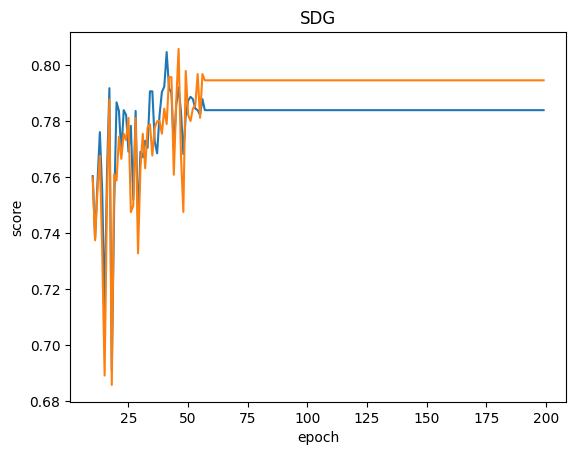

In [43]:

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(10,200,1)

train_score = []
val_score = []

for x in epoch:

  sc = SGDClassifier(loss="log_loss", penalty="l1", alpha = 0.0001,max_iter=x,random_state=201733922)
  scores = cross_validate(sc,train_scaled,train_target,return_train_score=True)
  train_score.append(np.mean(scores["train_score"]))
  val_score.append(np.mean(scores["test_score"]))

plt.title("SDG")
plt.xlabel("epoch")
plt.ylabel("score")
plt.plot(epoch,train_score)
plt.plot(epoch,val_score)


print(np.mean(scores['train_score']) , np.mean(scores['test_score']))

epoch에 대한 민감성 약간 나아졌으며, 성능적인 향상과 함께 과소적합을 보임

이번엔 학습에 따른 민감도를 낮추기 위해서 규제 강도 alpha의 값을 0.001로 좀더 높여보았다.

또한 epoch가 100 이후로는 유의미하지 않기 때문에 학습속도 향샹알 위해 max_iter의 범위를 10 ~ 100으로 제한하였다.

 ( SDG의 경우 일정 정확도가 지속적으로 유지될 경우 그 전까지에서 최적의 성능에 자동으로 수렴하기 때문에 정확한 max_iter를 할 필요가 없다. )


0.7982622090549505 0.8069612704789405


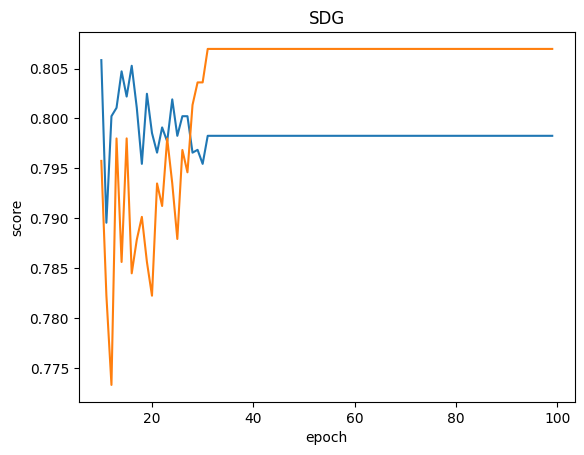

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(10,100,1)

train_score = []
val_score = []

for x in epoch:

  sc = SGDClassifier(loss="log_loss", penalty="l1", alpha = 0.0012,max_iter=x,random_state=201733922)
  scores = cross_validate(sc,train_scaled,train_target,return_train_score=True)
  train_score.append(np.mean(scores["train_score"]))
  val_score.append(np.mean(scores["test_score"]))

plt.title("SDG")
plt.xlabel("epoch")
plt.ylabel("score")
plt.plot(epoch,train_score)
plt.plot(epoch,val_score)


print(np.mean(scores['train_score']) , np.mean(scores['test_score']))

성능적인 향상을 보였으나, 과소적합이 해소되지 않았다.

loss 함수를 l1에서 다시 l2로 바꾸는 것으로 weight에 대한 민감성을 높여 과소적합을 해소하고자 했다.

0.8019068030319744 0.7901198920343984


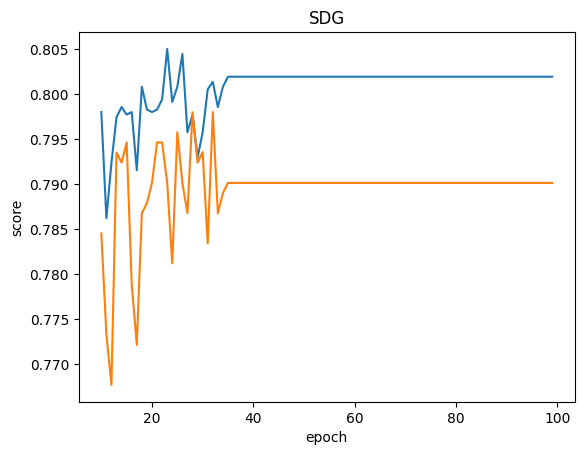

In [45]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(10,100,1)

train_score = []
val_score = []

for x in epoch:

  sc = SGDClassifier(loss="log_loss", penalty="l2", alpha = 0.0012,max_iter=x,random_state=201733922)
  scores = cross_validate(sc,train_scaled,train_target,return_train_score=True)
  train_score.append(np.mean(scores["train_score"]))
  val_score.append(np.mean(scores["test_score"]))

plt.title("SDG")
plt.xlabel("epoch")
plt.ylabel("score")
plt.plot(epoch,train_score)
plt.plot(epoch,val_score)


print(np.mean(scores['train_score']) , np.mean(scores['test_score']))

과소적합이 해소되었으며, 79% 정도의 정확도를 보인다.

이제 마지막으로 테스트 세트로 테스트하여 최종 점수를 확인할 것이다.

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt


sc = SGDClassifier(loss="log_loss", penalty="l2", alpha = 0.0012,max_iter=100,random_state=201733922)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.8035914702581369
0.916267942583732


데이터 상으로는 과소적합 상태로 보이지만,

교차 검증을 통한 검증데이터로 모니터링한 모델이고,

하이퍼파라미터에 test데이터가 영향을 미치지 않았었기 때문에 절대적인 데이터 갯수에 의한 최소적합일 확률이 높다.


In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt


sc = SGDClassifier(loss="log_loss", penalty="l2", alpha = 0.0012,max_iter=100,random_state=201733922)
sc.fit(test_scaled,test_target)

print(sc.score(test_scaled,test_target))
print(sc.score(train_scaled,train_target))


1.0
0.7867564534231201


테스트 세트를 통해 훈련을 진행하고, 훈련 세트를 통해 테스트를 진행했을 때, 다음과 같은결과가 나온것으로 보아

전처리한 데이터의 특성이 그냥 test 데이터 세트에 속해있던 데이터를 더 잘 구분해내는 것 같다.

근본적으로는 데이터의 양이 적어서 발생한 문제라고 볼 수 있지만, 타이타닉 생존자 데이터를 늘릴수는 없는만큼

최대한 해결하기 위해서 특성공학을 통해 특성을 늘린다음 진행해보았다.



In [48]:
# 온 힛 인코딩을 한 직후의 데이터 ( 정규화 이전 )
train_input_h_1 = train_input_h
test_input_h_1 = test_input_h

# 특성공학을 통해 특성 늘리기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 4)
poly.fit(train_input_h_1)

train_poly = poly.transform(train_input_h_1)
test_poly = poly.transform(test_input_h_1)

# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_poly_scaled = ss.transform(train_poly)
test_poly_scaled = ss.transform(test_poly)

# SDG 학습 기본
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
import numpy as np


sc = SGDClassifier(loss="log_loss", penalty="l2", alpha = 0.0012,max_iter=100,random_state=201733922)
scores = cross_validate(sc,train_poly_scaled,train_target,return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
print("//")

sc.fit(train_poly_scaled,train_target)

print(sc.score(train_poly_scaled,train_target))
print(sc.score(test_poly_scaled,test_target))

0.8395098255511606 0.8047642960266147
//
0.8204264870931538
0.8086124401913876


간단한 특성공학만으로 성능이 많이 올랐고 과소적합도 해결되었다.

결론적으로 80% 수준의 정확도를 나타내고 있다.

# 특성공학을 통한 특성 늘리기

SGD분류 문제에서 경험한 결과, 현재 Input 데이터가 현저히 적기 때문에 이후의 모델에서도 동일한 문제가 발생할 수 있음을 인식하였다

따라서 특성공학을 미리 적용하여 최대한 데이터의 유효성을 높이는 것이 옳다고 판단했다

In [ ]:
# 온 힛 인코딩을 한 직후의 데이터 ( 정규화 이전 )
train_input_h_1 = train_input_h
test_input_h_1 = test_input_h

# 특성공학을 통해 특성 늘리기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
poly.fit(train_input_h_1)

train_poly = poly.transform(train_input_h_1)
test_poly = poly.transform(test_input_h_1)

# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_poly_scaled = ss.transform(train_poly)
test_poly_scaled = ss.transform(test_poly)

# 결정트리



In [ ]:
#기본 결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import numpy as np

dc = DecisionTreeClassifier(random_state=201733922,)
scores = cross_validate(dc,train_poly_scaled,train_target,return_train_score=True)

print(np.mean(scores['train_score']) , np.mean(scores['test_score']))

0.9845678963707707 0.7565061829138158


과대적합 상태 -> 결정트리의 특징에 따라 강하게 과적합된 것으로 보인다.

결정트리의 경우, 각 노드가 1개의 특성을 기준으로 분기하기 때문에 각 특성의 범위 편차에 따른 왜곡이 없어 정규화 필요성이 없지만, 편의상 위에서 이미 만들어 놓은 train_poly_scaled를 이용할 것이다. ( 할 필요는 없지만, 해도 상관없음 )

결정트리의 하이퍼파라미터 및 기본값은 다음과 같다.

* criterion: str = "gini"
* splitter: str = "best"
* max_depth: Any | None = None
* min_samples_split: int = 2
* min_samples_leaf: int = 1
* min_weight_fraction_leaf: float = 0
* max_features: Any | None = None
* random_state: Any | None = None
* max_leaf_nodes: Any | None = None
* min_impurity_decrease: float = 0
* class_weight: Any | None = None
* ccp_alpha: float = 0) -> None

결정트리의 과대적합을 완화해주기 위해선

먼저 트리가 너무 깊게 분할하지 못하도록 하이퍼파라미터를 조정할 필요가 있다.

max_depth, min_samples_split, max_features, min_samples_leaf, criterion, min_impurity_decrease을 조정할 것이다.

* max_depth ->  최대 깊이를 제한하여 과대적합을 방지한다.

* min_samples_split -> 각 노드에 분할하기 위한 최소 샘플수를 설정한다. ( 이 값이 높을 수록 분할을 위한 최소샘플이 많이 필요해지며, 결과적으로 과도하게 깊어지는 것을 방지한다. )

* max_features -> 각 노드에서 사용할 최대 특성의 수를 제한한다. auto(-> 현재 "sqrt"로 바뀜)로 할 경우, 랜덤포레스트에서처럼 각 노드에서의 특성수가 제한되어 각 특성이 골고루 중요성을 나눠갖게 된다.

* min_samples_leaf -> 분할될 때 왼쪽 오른쪽 리프노드에서 가져야할 최소 샘플 데이터 수 -> min_samples_split과 비슷하지만, 이쪽은 한쪽 노드로 샘플이 극단적으로 몰아질 경우에도 분할하지 않는다는 특징이 있다.

* crierion => 제곱을 이용하여 불순도를 계산하는 지니불순도와 제곱근을 이용하여 불순도를 계산하는 엔트로피불순도를 선택하는 파라미터로, 일반적으로 지니불순도보다 엔트로피불순도가 성능이 좋다고 알려져있지만, 연산이 더 오래걸린다.

* min_impurity_decrease => 최소불순도를 조절하여, 노드가 분할하기 위한 불순도 최소량을 지정함

-------------------------

변경할 파라미터가 많기 때문에 그리드서치를 사용하여 하이퍼파라미터튜닝을 해줄 예정이다.

먼저 GridSearchCV는 자체적으로 교차검증을 지원하기 때문에 따로 scross_validate를 사용할 필요가 없다.

범위 선정 기준은 -> 기본적으로 특성의 기본값이 가장 범용적인 성능을 가져온다고 알고 있기 때문에, 기본값을 기준으로 위아래로 일정 범주를 설정했다.

단, 기본값이 없는 경우, 구글링을 통해 일반적인 수치를 파악한 뒤 범주화했다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {
    'max_depth':np.arange(1,20,1),
    'min_samples_split':np.arange(2,11,1),
    'min_samples_leaf':np.arange(1,11,1),
    'criterion':['gini','entropy'],
    'min_impurity_decrease':np.arange(0.0001,0.001,0.0001)
}

# 데이터가 많지 않기 때문에 cv=10으로 10 fold 교차검증으로 설정하여 -> 훈련데이터를 그나마 늘려준다.
# max_features를 auto로 설정하여, 특성공학으로 늘린 특성들의 중요도를 그나마 평균화시켜준다.
gs = GridSearchCV(DecisionTreeClassifier(random_state=201733922, max_features='sqrt'),param_grid=params,cv = 10, n_jobs=-1, error_score='raise')

gs.fit(train_poly_scaled,train_target)
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))


{'criterion': 'entropy', 'max_depth': 6, 'min_impurity_decrease': 0.0006000000000000001, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.8361548064918851


해당 파라미터로 학습 및 평가

In [ ]:
gs_dt = gs.best_estimator_

print(gs_dt.score(train_poly_scaled,train_target), gs_dt.score(test_poly_scaled,test_target))


0.8653198653198653 0.8397129186602871


과대적합 문제가 해소되었고 약 84%의 정확도를 보임

그러나 아래와 같이 특성 중요도를 살펴보면, 중요하게 사용되는 특성은 얼마되지 않는 것처럼 보임

In [ ]:
print(gs_dt.feature_importances_)

[0.         0.03422146 0.         0.         0.03426938 0.
 0.04693257 0.         0.         0.         0.         0.
 0.01172881 0.         0.         0.03824268 0.         0.
 0.         0.         0.00323331 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02867231 0.         0.
 0.         0.         0.         0.         0.         0.00686962
 0.         0.         0.         0.03972524 0.         0.01396077
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00178751 0.
 0.00477684 0.         0.         0.         0.13792682 0.00933044
 0.         0.         0.         0.         0.         0.
 0.00323331 0.         0.         0.03230932 0.         0.
 0.00256479 0.         0.00576461 0.         0.         0.
 0.         0.01047798 0.02528511 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

# 랜덤포레스트

특성 공학을 통해 특성 늘리기

In [ ]:
# 온 힛 인코딩을 한 직후의 데이터 ( 정규화 이전 )
train_input_h_1 = train_input_h
test_input_h_1 = test_input_h

# 특성공학을 통해 특성 늘리기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
poly.fit(train_input_h_1)

train_poly = poly.transform(train_input_h_1)
test_poly = poly.transform(test_input_h_1)

# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_poly_scaled = ss.transform(train_poly)
test_poly_scaled = ss.transform(test_poly)

In [ ]:
#기본 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import numpy as np

rf = RandomForestClassifier(random_state=201733922,n_jobs=-1,oob_score=True,)
scores = cross_validate(rf,train_poly_scaled,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']) , np.mean(scores['test_score']))
rf.fit(train_poly_scaled,train_target)


0.9845678963707707 0.8126169104262131


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=201733922)

과대적합 상태

기본 설정만으로도 81% 정도의 적중률을 보여주고 있음

아래의 특성 중요도를 위의 결정트리와 비교해보면,

더 많은 특성에 훈련기여를 부여하는 것으로 특성 중요도를 골고루 분배하는 랜덤포레스트의 특징을 볼 수 있음

In [ ]:
print(rf.feature_importances_)

[0.00000000e+00 8.05068129e-03 5.25955470e-03 1.62706802e-02
 2.57154593e-03 1.17775261e-03 2.03787056e-02 5.45443144e-04
 1.56991547e-04 2.66480307e-04 7.03475123e-03 2.24094533e-02
 1.90777580e-02 2.82018578e-03 1.52089695e-03 1.53409360e-02
 1.13929119e-03 1.82078628e-04 5.38064890e-03 1.78821318e-02
 1.93172657e-02 2.32309095e-03 2.84101152e-04 2.17299263e-02
 2.60574719e-03 0.00000000e+00 2.65462068e-03 1.82227628e-02
 3.11343469e-03 2.01633265e-03 2.08010765e-02 2.88438840e-03
 1.37702037e-03 1.04774754e-02 1.54259302e-03 1.30767564e-03
 4.04000631e-03 7.44047681e-04 2.88074587e-04 1.79007671e-03
 6.20847301e-04 2.30971515e-03 4.23965042e-04 4.15213484e-04
 5.96984331e-04 1.65302298e-02 4.08936755e-03 8.46728321e-04
 9.51189088e-03 5.04958484e-04 0.00000000e+00 0.00000000e+00
 1.57074376e-04 0.00000000e+00 2.59587623e-04 7.04326278e-03
 2.39410237e-02 2.29666982e-02 4.16395041e-03 4.43469527e-03
 1.42947348e-02 7.24518820e-04 5.77710931e-05 8.97714971e-03
 2.07442474e-02 3.269640

랜덤포레스트의 OOB 점수를 뽑아보면, 위의 검증데이터 적중률과 거의 일치함

In [ ]:
print(rf.oob_score_)

0.8125701459034792


랜덤포레스트의 하이퍼파라미터와 각 기본값은 아래와 같다.

* n_estimators: int = 100,
* criterion: str = "gini"
* max_depth: Any | None = None
* min_samples_split: int = 2
* min_samples_leaf: int = 1
* min_weight_fraction_leaf: float = 0
* max_features: str = "sqrt"
* max_leaf_nodes: Any | None = None
* min_impurity_decrease: float = 0
* bootstrap: bool = True
* oob_score: bool = False
* n_jobs: Any | None = None
* random_state: Any | None = None
* verbose: int = 0
* warm_start: bool = False
* class_weight: Any | None = None
* ccp_alpha: float = 0
* max_samples: Any | None = None

----------------

일단 과대적합 문제를 해결해야 하며, 가능하면 87% 에 근접한 정확도를 만들기 위해 하이퍼 파라미터를 조정할 것이다.

여기서는 n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_impurity_decrease, max_leaf_nodes 의 하이퍼파라미터를 조정할 것이다.

n_estimators의 경우, 트리의 개수를 증가시키므로, 성능을 향상시키지만, 필요한 연산이 늘어나고( 시간이 오래걸림 ) 일정량 이상에서부터는 향상의 폭이 적어지므로, 적절한 값을 찾아야한다.

criterion의 경우 결정트리와 동일하게 불순도 계산에 의한 것인데, 일반적으로는 지니불순도가 유리하지만, 엔트로피 불순도가 유리한 경우가 분명히 있기 때문에 직접 해봐야한다.

max_depth의 경우, 증가할수록 트리가 깊어지기 때문에 더 많은 패턴을 잡아낼 수 있지만, 그만큼 과적합될 수 있으므로, 어느정도 제한해야한다.

이외의 min_samples_split, min_samples_leaf, min_impurity_decrease 하이퍼파라미터는 노드의 생성에 대한 제약을 늘려주는 파라미터들로 일반적으로 값이 커질수록 노드에 가해지는 제약이 증가하여 노드가 적게 생성되며, 결과적으로 모델의 단순성을 증가시키고, 일부 정보의 손실을 발생시키지만, 그만큼 노이즈가 적어지고 과대적합에서 멀어질 수 있다.

* min_samples_split : 노드 분할을 위한 최소 샘플 수
* min_samples_leaf : 리프노드가 가져야할 최소 샘플 수 ( 만족하지 않으면 분할하지 않음 )
* min_impurity_decrease : 노드 분할을 위한 최소 불순도 ( 트리는 불순도를 감소시키는 방향으로 뻗어나감 -> 불순도가 지정한 양보다 적은 비율로 감소한다면 노드를 분할하지 않음 )

------------------

위와 같은 이유들을 근거로 해당 하이퍼파리미터들을 기준으로 그리드서치를 실행할 것입니다.

------------

n_estimators -> 연산속도에 직접적인 영향이 있는 파라미터이면서 대략적인 양만 충족하면 되므로 -> 범위를 범주화하고, 20씩 건너뛰게 설정

max_depth -> 노드의 깊이에 대한 부분이므로 꼼꼼히 짚어야함,
따라서 3 ~ 20 의 범위에서 1씩 증가하도록 설정

min_samples_split,min_samples_leaf -> 경험적으로 확인해야하는 노드이지만, 최소값이기 때문에 10을 벗어나면 안된다고 생각함
따라서 2 ~ 10 범위에서 1씩 증가하도록 설정

min_impurity_decrease -> 불순도감소량이라는 감소량과 관련된 수치이기 때문에 아주 작은 양부터 천천히 올려야함 ( 올리는 이유는 제약을 늘려서 과대적합에서 벗어나기 위해서 ) 0.0001에서 0.001까지 0.0001씩 올라가도록 설정





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

params = {
    'n_estimators': np.arange(50,200,20),
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3,20,1),
    'min_samples_split': np.arange(2,11,1),
    'min_samples_leaf': np.arange(1,11,1),
    'min_impurity_decrease': np.arange(0.0001,0.0011,0.0001)
}

gs = GridSearchCV(RandomForestClassifier(random_state=201733922,n_jobs=-1,oob_score = True),params,n_jobs=-1)

gs.fit(train_poly_scaled,train_target)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))


이 상태로 훈련을 하려고 했는데, 너무 오래 걸려서, 영향이 적을것으로 예상되는 하이퍼파라미터를 몇개 빼기로 함

( 1초에 한개의 모델이 나온다고 했을 때, 68시간 걸림 )

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

params = {
    'n_estimators': np.arange(50,200,20),
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3,20,1),
    'min_impurity_decrease': np.arange(0.0001,0.0011,0.0001)
}

gs = GridSearchCV(RandomForestClassifier(random_state=201733922,n_jobs=-1,oob_score = True),params,n_jobs=-1)

gs.fit(train_poly_scaled,train_target)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

# 결과값 - 훈련시간이 너무 오래 걸려서 미리 기록 (1시간 30분 걸림)
# {'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0005, 'n_estimators': 70}
# 0.8417613458037788

{'criterion': 'gini', 'max_depth': 7, 'min_impurity_decrease': 0.0005, 'n_estimators': 70}
0.8417613458037788


튜닝한 하이퍼파라미터로 학습 및 확인

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(random_state=201733922,n_jobs=-1,oob_score = True, criterion = 'gini',max_depth=7,min_impurity_decrease=0.0005,n_estimators=70)

rf.fit(train_poly_scaled,train_target)

print(rf.score(train_poly_scaled,train_target))
print(rf.score(test_poly_scaled,test_target))

0.9046015712682379
0.8803827751196173


과대적합이 해결되었으며,

test 세트에 대해 88%의 적중률을 보였다.

# 히스토그램기반 그래디언트 부스팅

특성공학을 통해 특성 늘리기

In [11]:
# 온 힛 인코딩을 한 직후의 데이터 ( 정규화 이전 )
train_input_h_1 = train_input_h
test_input_h_1 = test_input_h

# 특성공학을 통해 특성 늘리기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
poly.fit(train_input_h_1)

train_poly = poly.transform(train_input_h_1)
test_poly = poly.transform(test_input_h_1)

# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_poly_scaled = ss.transform(train_poly)
test_poly_scaled = ss.transform(test_poly)

In [10]:
#기본 히스토그램기반 그래디언트 부스팅
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate
import numpy as np

hg = HistGradientBoostingClassifier(random_state=201733922,)
scores = cross_validate(hg,train_poly_scaled,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']) , np.mean(scores['test_score']))

0.984006886553099 0.8069612704789403


과대적합상태이며,

기본 랜덤포레스트 모델와 비교해보았을 때, 정확도가 아주 약간 떨어진다.

----------

히스토그램기반 그래디언트 부스팅의 하이퍼파라미터 및 그 기본값은 다음과 같다.

* loss: str = "log_loss"
* learning_rate: float = 0.1
* max_iter: int = 100
* max_leaf_nodes: int = 31
* max_depth: Any | None = None
* min_samples_leaf: int = 20
* l2_regularization: float = 0
* max_bins: int = 255
* categorical_features: Any | None = None
* monotonic_cst: Any | None = None
* interaction_cst: Any | None = None
* warm_start: bool = False
* early_stopping: str = "auto"
* scoring: str = "loss"
* validation_fraction: float = 0.1
* n_iter_no_change: int = 10
* tol: float = 1e-7
* verbose: int = 0
* random_state: Any | None = None
* class_weight: Any | None = None

---------------

위의 하이퍼파라미터에서 learning_rate,max_iter, max_depth,l2_regularization, max_bins의 값을 변경하여 과대적합을 없애볼 것이다.

learning_rate의 경우, 경사하강법과 유사하게 현재 학습의 가중치가 다음 학습의 가중치에 영향을 미치는 정도라고 볼 수 있으며, 이를 0.01에서 0.1 사이의 범위로 축소시켜 모델의 성능을 높일 것이다.

max_iter의 경우, 몇번의 반복학습을 할 것인가를 정하는 것으로, 일정량까지는 성능이 크게 오르지만, 어느 순간부터 특정 성능에 수렴하기 때문에 적당히 70~ 130 사이를 20 간격으로 늘려나갈 예정이다.

max_depth의 경우, 트리의 최대 깊이를 의미하는 것으로, 과대적합을 줄이기 위해서 3~11까지 1씩 증가시킬 예정이다. ( 데이터의 양이 적기 때문에 애초에 깊게 내려가지 못한다. )

l2_regularization의 경우, l2 규제를 추가하는 것으로 과대적합을 낮추기 위하여 사용할 것이다. 어느정도의 영향을 미칠지 아직 모르기 때문에 (0.01,0.001)로 넣어볼 예정이다.

max_bins의 경우, 특성을 분할하는 범위에 대한 내용으로 100에서 255 까지 20씩 증가시켜볼 것이다.

-------------

동시에 돌릴 경우 너무 오래 걸리기 때문에, 가장 범위가 넓은 max_bins를 빼놓고 나머지로 돌려보기로 함

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

params = {
    'learning_rate': np.arange(0.01,0.15,0.01),
    'max_iter':[70,90,110,130],
    'max_depth': np.arange(3,12,1),
    'l2_regularization': [0.01,0.001],
}

gs = GridSearchCV(HistGradientBoostingClassifier(random_state=201733922),params,n_jobs=-1)

gs.fit(train_poly_scaled,train_target)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

# 너무 오래 걸리기 때문에, 출력값을 기록해놓았음
# {'l2_regularization': 0.001, 'learning_rate': 0.060000000000000005, 'max_depth': 10, 'max_iter': 110}
# 0.8372606867114432


{'l2_regularization': 0.001, 'learning_rate': 0.060000000000000005, 'max_depth': 10, 'max_iter': 110}
0.8372606867114432


하이퍼파라미터로 지정된 값을 기준으로 max_bins의 하이퍼파라미터를 확인


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

params = {
    'max_bins' : [150,170,190,210,230,250,255]
}

gs = GridSearchCV(HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=110,max_depth=10,l2_regularization=0.001),params,n_jobs=-1)

gs.fit(train_poly_scaled,train_target)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))


{'max_bins': 255}
0.8372606867114432


max_bins은 기본값은 255에서 최대 정확도를 보였다.

하이퍼파라미터 튜닝으로 최적화된 모델을 test세트에 평가해보았다.

In [23]:
hg = gs.best_estimator_

print(hg.score(train_poly_scaled,train_target))
print(hg.score(test_poly_scaled,test_target))

0.941638608305275
0.84688995215311


정확도는 85%의 높은 수치를 보이지만, 약간 과대적합의 징후도 같이 보인다.

과대적합을 줄이기 위해 min_samples_leaf 와 max_leaf_nodes를 조정해볼 것이다.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

params = {
    'min_samples_leaf' : np.arange(20,40,1),
    'max_leaf_nodes' : np.arange(20,32,1)
}

gs = GridSearchCV(HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=110,max_depth=10,l2_regularization=0.001),params,n_jobs=-1)

gs.fit(train_poly_scaled,train_target)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_leaf_nodes': 21, 'min_samples_leaf': 21}
0.8372606867114432


두 하이퍼파라미터 모두 범위내에 최소값으로 설정된 것으로 보아 범위가 잘못된 것일수도 있다고 생각했다.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

params = {
    'min_samples_leaf' : np.arange(10,30,1),
    'max_leaf_nodes' : np.arange(5,30,1)
}

gs = GridSearchCV(HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=110,max_depth=10,l2_regularization=0.001),params,n_jobs=-1)

gs.fit(train_poly_scaled,train_target)

print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_leaf_nodes': 21, 'min_samples_leaf': 21}
0.8372606867114432


범위를 바꿔도 동일한 것으로 보아 범위 문제가 아니라, 해당 파라미터가 근본적인 원인이 아닌 듯 보인다.

현재 하이퍼파라미터가 나름 적당선이라는 전제하에 각 파라미터의 변화추이를 모니터링 해봐야 할 것 같다.

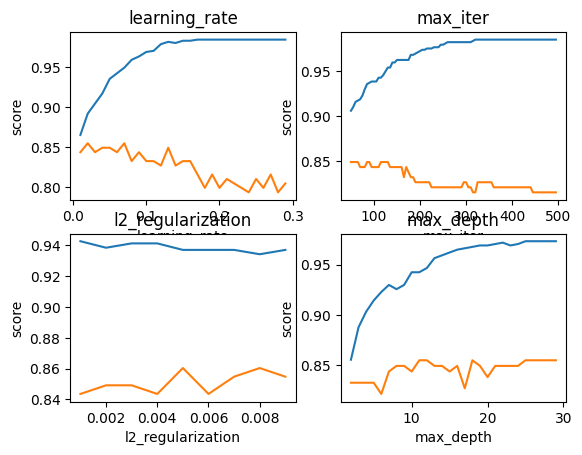

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# 과대적합을 확인하기 위해 검증세트를 나눔
exm_input,val_input,exm_target,val_target = train_test_split(train_poly_scaled, train_target,test_size=0.2,random_state=201733922,stratify=train_target)

learning_rate_param = np.arange(0.01,0.3,0.01)
max_iter_param = np.arange(50,500,5)
l2_regularization_param = np.arange(0.001,0.01,0.001)
max_depth_param = np.arange(2,30,1)

# learning_rate
train_score = []
val_score = []
for x in learning_rate_param:
  hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=x,max_iter=110,max_depth=10,l2_regularization=0.001)
  hgb.fit(exm_input,exm_target)

  train_score.append(hgb.score(exm_input,exm_target))
  val_score.append(hgb.score(val_input,val_target))

plt.subplot(221)
plt.title("learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("score")
plt.plot(learning_rate_param,train_score)
plt.plot(learning_rate_param,val_score)

# max_iter
train_score = []
val_score = []
for x in max_iter_param:
  hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=x,max_depth=10,l2_regularization=0.001)
  hgb.fit(exm_input,exm_target)

  train_score.append(hgb.score(exm_input,exm_target))
  val_score.append(hgb.score(val_input,val_target))

plt.subplot(222)
plt.title("max_iter")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.plot(max_iter_param,train_score)
plt.plot(max_iter_param,val_score)

# l2_regularization
train_score = []
val_score = []
for x in l2_regularization_param:
  hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=110,max_depth=10,l2_regularization=x)
  hgb.fit(exm_input,exm_target)

  train_score.append(hgb.score(exm_input,exm_target))
  val_score.append(hgb.score(val_input,val_target))

plt.subplot(223)
plt.title("l2_regularization")
plt.xlabel("l2_regularization")
plt.ylabel("score")
plt.plot(l2_regularization_param,train_score)
plt.plot(l2_regularization_param,val_score)

# max_depth
train_score = []
val_score = []
for x in max_depth_param:
  hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=110,max_depth=x,l2_regularization=0.001)
  hgb.fit(exm_input,exm_target)

  train_score.append(hgb.score(exm_input,exm_target))
  val_score.append(hgb.score(val_input,val_target))

plt.subplot(224)
plt.title("max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(max_depth_param,train_score)
plt.plot(max_depth_param,val_score)

l2_regularization은 이 모델에서 과대적합과 크게 연관성이 없는 것으로 보임

learning_rate, max_depth, max_iter 특성들은 범위의 값을 낮추는 것으로 새로운 규칙을 볼 수 있을 것으로 보임



-----------

위의 사실을 적용하여 범위를 하향 조정함


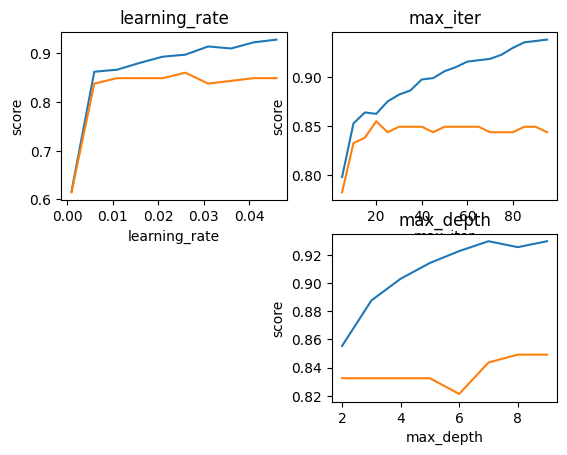

In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# 과대적합을 확인하기 위해 검증세트를 나눔
exm_input,val_input,exm_target,val_target = train_test_split(train_poly_scaled, train_target,test_size=0.2,random_state=201733922,stratify=train_target)

learning_rate_param = np.arange(0.001,0.05,0.005)
max_iter_param = np.arange(5,100,5)
max_depth_param = np.arange(2,10,1)

# learning_rate
train_score = []
val_score = []
for x in learning_rate_param:
  hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=x,max_iter=110,max_depth=10,l2_regularization=0.001)
  hgb.fit(exm_input,exm_target)

  train_score.append(hgb.score(exm_input,exm_target))
  val_score.append(hgb.score(val_input,val_target))

plt.subplot(221)
plt.title("learning_rate")
plt.xlabel("learning_rate")
plt.ylabel("score")
plt.plot(learning_rate_param,train_score)
plt.plot(learning_rate_param,val_score)

# max_iter
train_score = []
val_score = []
for x in max_iter_param:
  hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=x,max_depth=10,l2_regularization=0.001)
  hgb.fit(exm_input,exm_target)

  train_score.append(hgb.score(exm_input,exm_target))
  val_score.append(hgb.score(val_input,val_target))

plt.subplot(222)
plt.title("max_iter")
plt.xlabel("max_iter")
plt.ylabel("score")
plt.plot(max_iter_param,train_score)
plt.plot(max_iter_param,val_score)

# max_depth
train_score = []
val_score = []
for x in max_depth_param:
  hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=110,max_depth=x,l2_regularization=0.001)
  hgb.fit(exm_input,exm_target)

  train_score.append(hgb.score(exm_input,exm_target))
  val_score.append(hgb.score(val_input,val_target))

plt.subplot(224)
plt.title("max_depth")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.plot(max_depth_param,train_score)
plt.plot(max_depth_param,val_score)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

learning_rate(학습률)은 0.005 지점에서 과대적합이 가장 적음

max_iter는 20 지점에서 과대적합이 가장 적음

max_depth는 2 지점에서 과대적합이 가장 적음

------

--> 이중에서  max_iter가 20인 지점과 learning_rate가 0.025인 지점의 평가를 비교하여 더 높은 모델을 최종적으로 선택할 것이다.

learning_rate가 0.025인 모델을 통해 평가

In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.025,max_iter=110,max_depth=10,l2_regularization=0.001)

hgb.fit(train_poly_scaled,train_target)

print(hgb.score(train_poly_scaled,train_target))
print(hgb.score(test_poly_scaled,test_target))

0.9057239057239057
0.8588516746411483


max_iter가 20인 모델을 통해 평가

In [20]:
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

hgb = HistGradientBoostingClassifier(random_state=201733922,learning_rate=0.06,max_iter=20,max_depth=10,l2_regularization=0.001)

hgb.fit(train_poly_scaled,train_target)

print(hgb.score(train_poly_scaled,train_target))
print(hgb.score(test_poly_scaled,test_target))

0.8731762065095399
0.8636363636363636


비교해보았을 때,

max_iter가 20인 모델쪽이 과대적합도 훨씬 덜 되었고, 정답률도 더 높게 나왔다.

따라서 max_iter가 20인 모델을 최종적으로 선택하였다.

이 모델은 과대적합이 거의 일어나지 않았으며, 86% 정도의 정확도를 가진다.